In [1]:
# transfer learning on cat/dog model to also classify flowers

# flower set: https://www.kaggle.com/sauravagarwal/flower-classificationuhu
#             https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
#            pexels

# resources: https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/
#            https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
#            https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
#            https://www.askpython.com/python/examples/list-files-in-a-directory-using-python

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout, InputLayer, GlobalAveragePooling2D, RepeatVector, Input, Reshape
from tensorflow.keras.layers import experimental
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
from numpy import asarray
from numpy import argmax

import glob

import os

from IPython.display import display

import PIL
from PIL import Image

from matplotlib import pyplot as plt

# TensorBoard
%reload_ext tensorboard
import datetime

In [3]:
BATCHSIZE = 32

In [4]:
base_model = load_model('catdog.h5')

In [5]:
base_model.include_top = False

In [6]:
trainDir = '/Users/kaylaneal/Downloads/alzResearch/flower_photos/train'

testDir = '/Users/kaylaneal/Downloads/alzResearch/flower_photos/test'

In [7]:
trains = tf.keras.preprocessing.image_dataset_from_directory (trainDir, labels = 'inferred', label_mode = 'categorical', 
                                                              color_mode = 'rgb', batch_size = BATCHSIZE, image_size = (64,64))

tests = tf.keras.preprocessing.image_dataset_from_directory (testDir, labels = 'inferred', label_mode = 'categorical', 
                                                              color_mode = 'rgb', batch_size = BATCHSIZE, image_size = (64,64))

Found 2689 files belonging to 2 classes.
Found 208 files belonging to 2 classes.


In [8]:
base_model.trainable = False

In [13]:
SHAPE = (64, 64, 3)

In [27]:
# add new classifier layers
flat = Flatten()(base_model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat)
c2 = Dense(64, activation = 'relu')(class1)
drop1 = Dropout(0.3)(c2)
output = Dense(2, activation='softmax')(drop1)
# define new model
model = tf.keras.Model(inputs=base_model.inputs, outputs=output)

In [28]:
#model.summary()

In [29]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5, verbose = 1, restore_best_weights = True)]

In [32]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 55582), started 0:10:51 ago. (Use '!kill 55582' to kill it.)

In [33]:
history = model.fit(trains, steps_per_epoch=len(trains), validation_data=tests, validation_steps=len(tests), epochs=30, callbacks = [tensorboard_callback, callbacks])

Epoch 1/30
85/85 [==============================] - 14s 146ms/step - loss: 0.7148 - accuracy: 0.5370 - val_loss: 0.6882 - val_accuracy: 0.5625
Epoch 2/30
85/85 [==============================] - 10s 111ms/step - loss: 0.6970 - accuracy: 0.5262 - val_loss: 0.6857 - val_accuracy: 0.5625
Epoch 3/30
85/85 [==============================] - 9s 97ms/step - loss: 0.6915 - accuracy: 0.5203 - val_loss: 0.6867 - val_accuracy: 0.5625
Epoch 4/30
85/85 [==============================] - 9s 97ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6879 - val_accuracy: 0.4952
Epoch 5/30
85/85 [==============================] - 9s 97ms/step - loss: 0.6911 - accuracy: 0.5154 - val_loss: 0.6865 - val_accuracy: 0.5625
Epoch 6/30
85/85 [==============================] - 9s 97ms/step - loss: 0.6891 - accuracy: 0.5221 - val_loss: 0.6853 - val_accuracy: 0.5625
Epoch 7/30
85/85 [==============================] - 9s 97ms/step - loss: 0.6896 - accuracy: 0.5292 - val_loss: 0.6860 - val_accuracy: 0.5625
Epoch 8/3

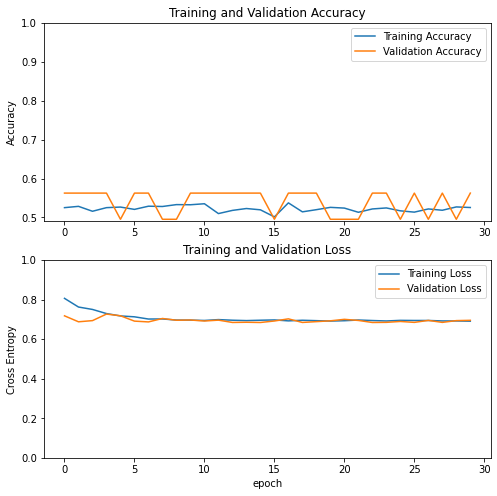

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)


plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [34]:
trainrose = '/Users/kaylaneal/Downloads/alzResearch/flower_photos/train/roses'

In [35]:
# List of files in complete directory
rose_list = []

"""
	Loop to extract files inside a directory

	path --> Name of each directory
	folders --> List of subdirectories inside current 'path'
	files --> List of files inside current 'path'

"""
i = 0

for path, folders, files in os.walk(trainrose):
    for file in files:
        if (i <= 15):
            rose_list.append(os.path.abspath(os.path.join(trainrose, file)))
            i += 1
        else:
            break

rose


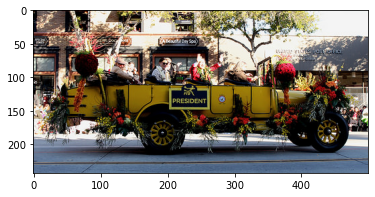

sunflower


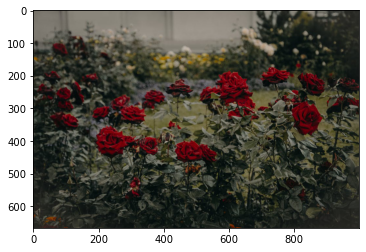

sunflower


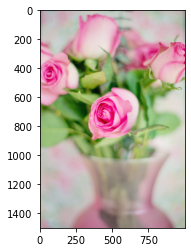

sunflower


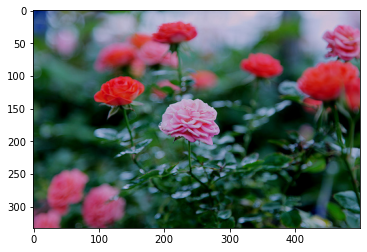

sunflower


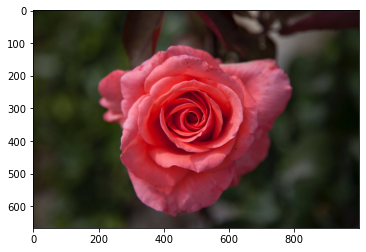

rose


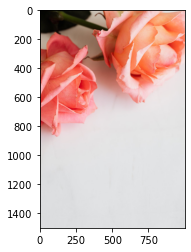

sunflower


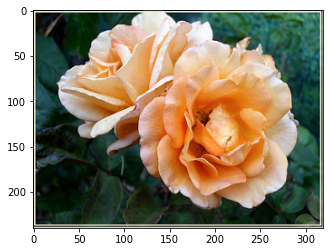

sunflower


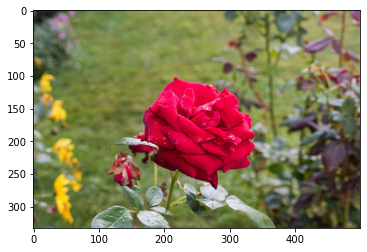

rose


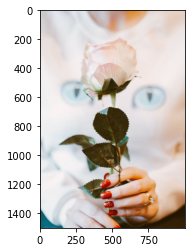

sunflower


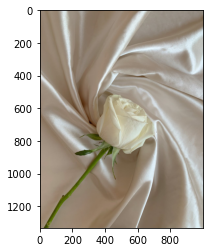

sunflower


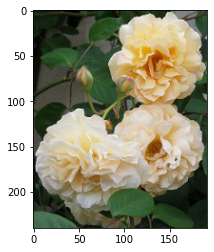

rose


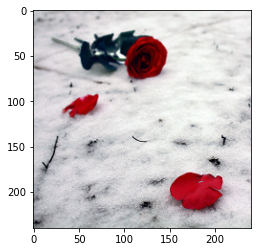

sunflower


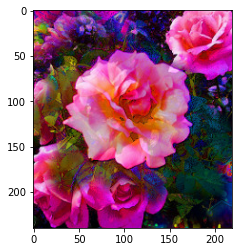

rose


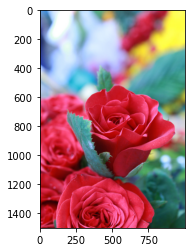

sunflower


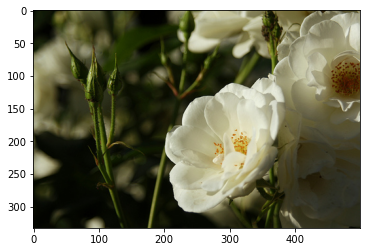

sunflower


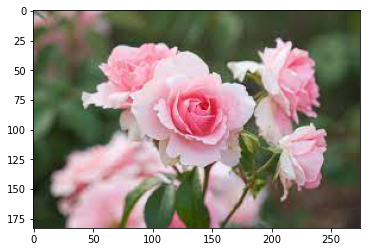

5 / 16 correct


In [36]:
j = 0
r = 0
s = 0

for test_image in rose_list:
    while (j <= 15):
        test_image= load_img(rose_list[j], target_size = SHAPE) 
        test_image = img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        test_image = test_image.reshape((-1, 64, 64, 3))
        result = model.predict(test_image, batch_size = 10)
        predic = argmax(result)
        printphoto = plt.imread(rose_list[j])
        phot = plt.imshow(printphoto)
        if predic >= 0.5:
            print ('rose')
            r += 1
        else:
            print ('sunflower')
            s +=1
        plt.show()
        j +=1
        
print (r, '/', r+s, 'correct')